## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
#pip install scikit-multilearn
#pip install graphviz

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.tree import _tree
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

### (a) Obtain Data

Get the Accute Inamations Data Set

In [3]:
cols=['Temp_patient','Nausea','Lumbar_pain','Urine','Micturition','Urethra','Inflammation','Nephritis']

In [4]:
data = pd.read_csv("data/diagnosis.data", encoding='utf-8', delimiter="\t", header=None, names=cols, decimal=',')
data

Temp_patient Nausea Lumbar_pain Urine Micturition Urethra Inflammation  \
0            35.5     no         yes    no          no      no           no   
1            35.9     no          no   yes         yes     yes          yes   
2            35.9     no         yes    no          no      no           no   
3            36.0     no          no   yes         yes     yes          yes   
4            36.0     no         yes    no          no      no           no   
..            ...    ...         ...   ...         ...     ...          ...   
115          41.4     no         yes   yes          no     yes           no   
116          41.5     no          no    no          no      no           no   
117          41.5    yes         yes    no         yes      no           no   
118          41.5     no         yes   yes          no     yes           no   
119          41.5     no         yes   yes          no     yes           no   

    Nephritis  
0          no  
1          no  
2          no  
3          no  
4          no  
..        ...  
115       yes  
116        no  
117       yes  
118       yes  
119       yes  

[120 rows x 8 columns]

In [5]:
data = data.replace({'yes':1 ,'no':0})

In [6]:
# features=['Temp_patient','Nausea','Lumbar_pain','Urine','Micturition','Urethra']
# target=['Inflammation','Nephritis']
# X = data[features] # Features
# y = data[target] # Target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
independent = data.iloc[:,:-2]
dependent = data.iloc[:,-2:]

In [8]:
independent

Temp_patient  Nausea  Lumbar_pain  Urine  Micturition  Urethra
0            35.5       0            1      0            0        0
1            35.9       0            0      1            1        1
2            35.9       0            1      0            0        0
3            36.0       0            0      1            1        1
4            36.0       0            1      0            0        0
..            ...     ...          ...    ...          ...      ...
115          41.4       0            1      1            0        1
116          41.5       0            0      0            0        0
117          41.5       1            1      0            1        0
118          41.5       0            1      1            0        1
119          41.5       0            1      1            0        1

[120 rows x 6 columns]

In [9]:
dependent

Inflammation  Nephritis
0               0          0
1               1          0
2               0          0
3               1          0
4               0          0
..            ...        ...
115             0          1
116             0          0
117             0          1
118             0          1
119             0          1

[120 rows x 2 columns]

### (b) Build a decision tree

In [10]:
model= tree.DecisionTreeClassifier()
classifier = LabelPowerset(model)

y = classifier.transform(dependent)
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 3, 0, 2,
       3, 3, 0, 2, 3, 3, 0, 2, 2, 2, 3, 3, 2, 3, 0, 2, 2, 3, 3, 0, 2, 2,
       3, 0, 2, 2, 3, 2, 0, 2, 2, 2])

[Text(0.4, 0.9, 'Lumbar_pain <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]\nclass = 1'),
 Text(0.2, 0.7, 'Temp_patient <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]\nclass = 1'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]\nclass = 1'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]\nclass = 0'),
 Text(0.6, 0.7, 'Temp_patient <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]\nclass = 2'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]\nclass = 0'),
 Text(0.7, 0.5, 'Micturition <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]\nclass = 2'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]\nclass = 2'),
 Text(0.8, 0.3, 'Urine <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]\nclass = 3'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]\nclass = 2'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]\nclass = 3')]

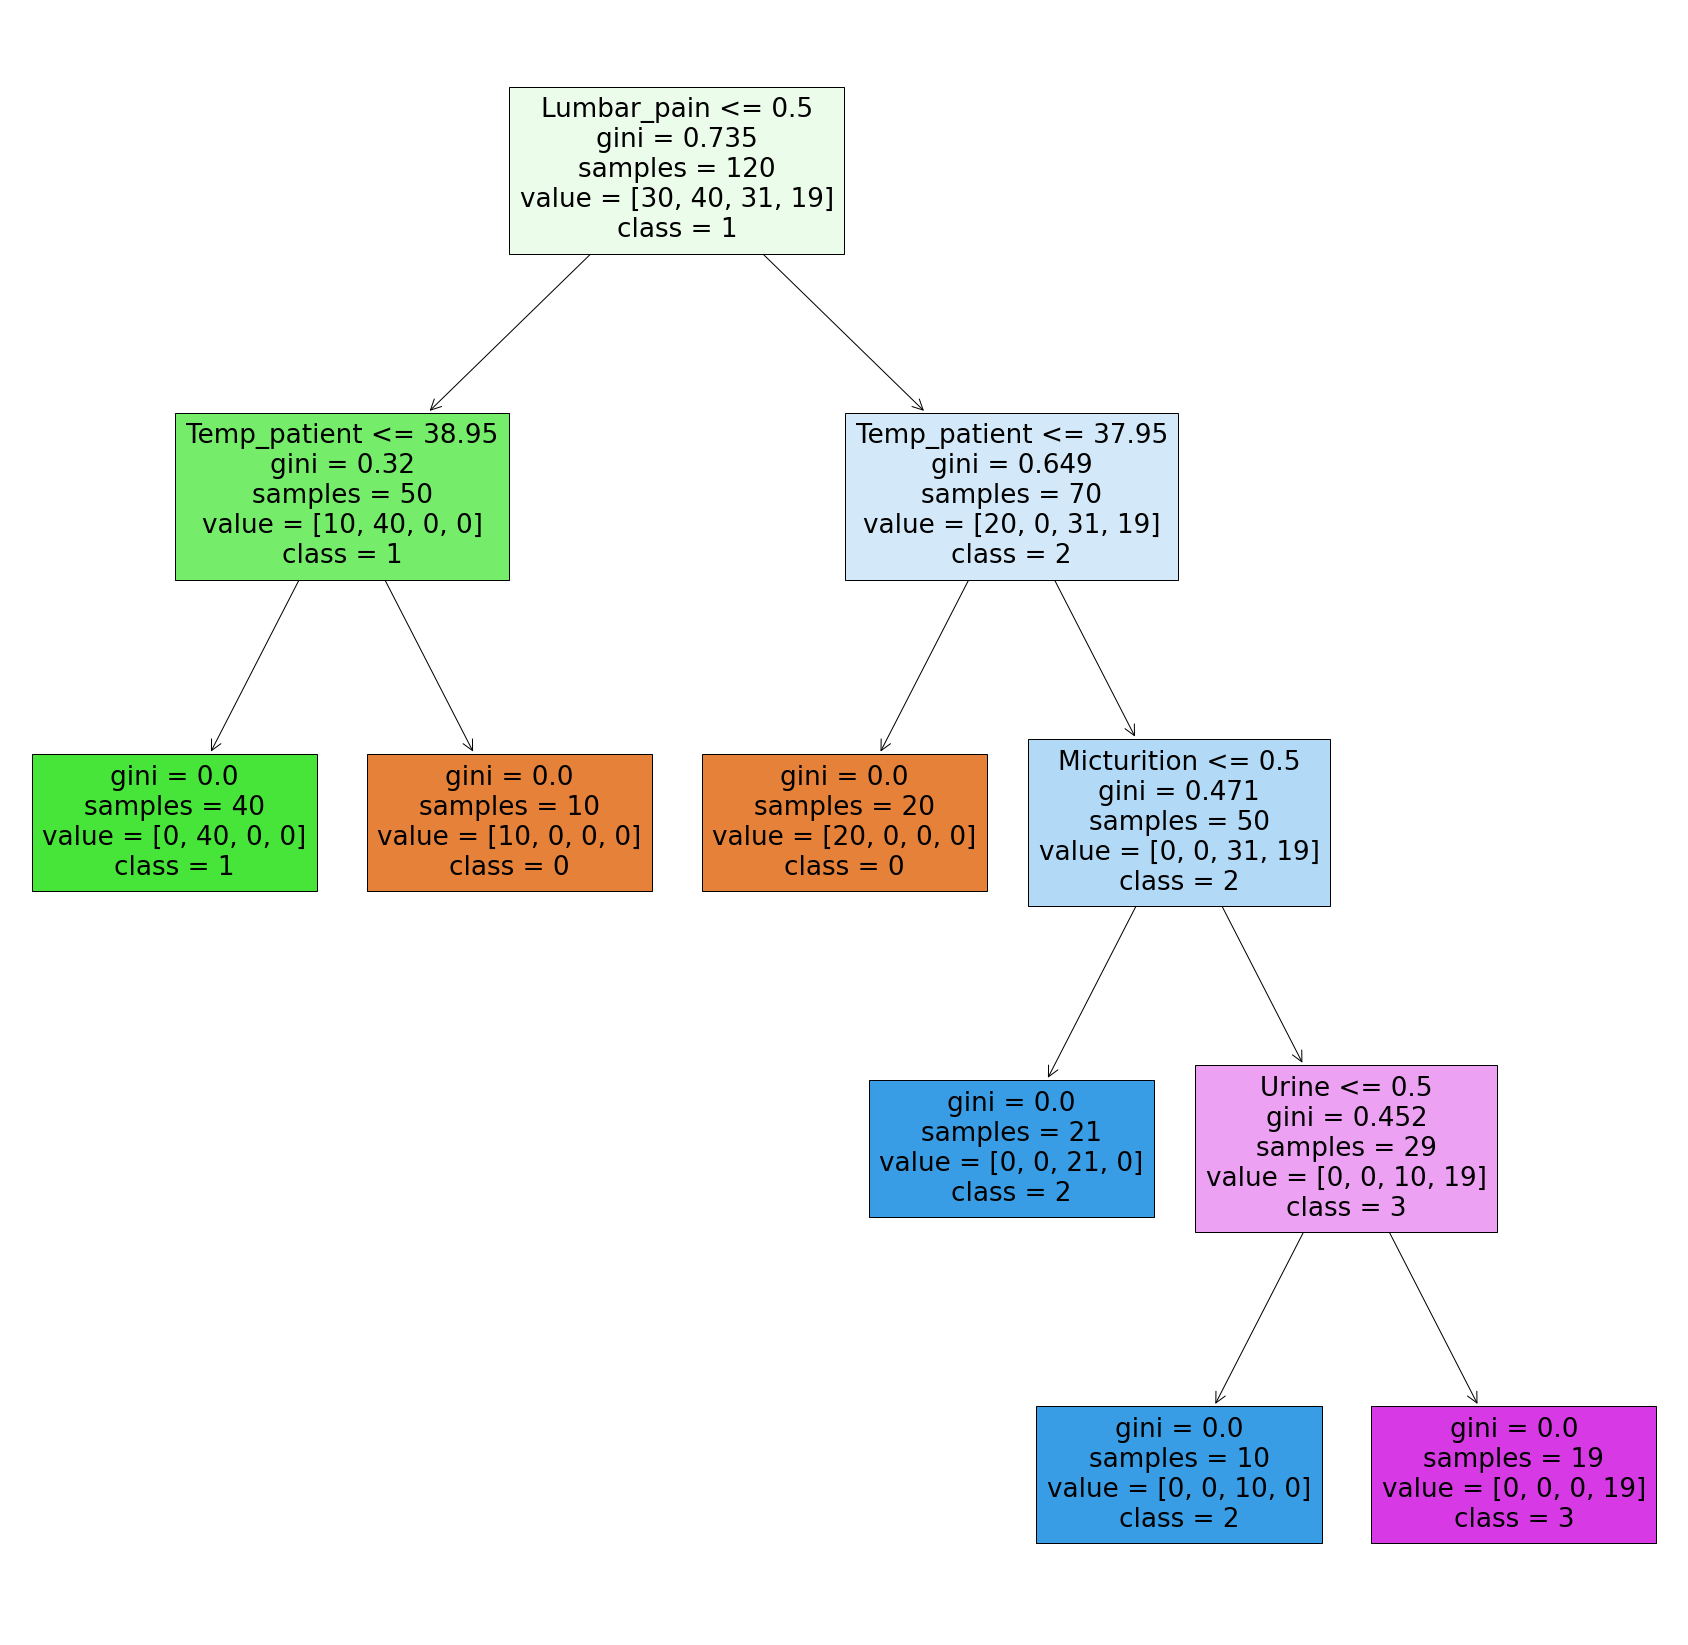

In [11]:
clf = model.fit(independent,y)
fig, axe = plt.subplots(figsize=(30,30))
tree.plot_tree(clf, filled=True, feature_names=cols, class_names=['0','1','2','3'])

### (c) Convert the decision rules

In [12]:
def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as a Python function
    Parameters:
    -----------
    tree: decision tree model
    The decision tree to represent as a function
    feature_names: list
    The feature names of the dataset used for building the decision tree
    """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
            
    recurse(0,1)

In [13]:
tree_to_code(model, cols)

def tree(Temp_patient, Nausea, Lumbar_pain, Urine, Micturition, Urethra, Inflammation, Nephritis):
  if Lumbar_pain <= 0.5:
    if Temp_patient <= 38.95000076293945:
      return [[ 0. 40.  0.  0.]]
    else:  # if Temp_patient > 38.95000076293945
      return [[10.  0.  0.  0.]]
  else:  # if Lumbar_pain > 0.5
    if Temp_patient <= 37.95000076293945:
      return [[20.  0.  0.  0.]]
    else:  # if Temp_patient > 37.95000076293945
      if Micturition <= 0.5:
        return [[ 0.  0. 21.  0.]]
      else:  # if Micturition > 0.5
        if Urine <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if Urine > 0.5
          return [[ 0.  0.  0. 19.]]


### (d) Cost-complexity pruning 

In [14]:
model1 = DecisionTreeClassifier(random_state=42)
path = model1.cost_complexity_pruning_path(independent, y)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.09816667, 0.13333333, 0.182     , 0.22291667])

In [15]:
grid_search = GridSearchCV(model1,cv=10,param_grid={'ccp_alpha':alphas})
grid_search.fit(independent,y)

best_alpha = grid_search.best_params_['ccp_alpha']
print('Best ccp Alpha value: ',best_alpha)

Best ccp Alpha value:  0.0


In [16]:
pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned.fit(independent, y)

score = pruned.score(independent, y)
print("Accuracy score:", score)

Accuracy score: 1.0


[Text(0.4, 0.9, 'Lumbar_pain <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]\nclass = 1'),
 Text(0.2, 0.7, 'Urine <= 0.5\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]\nclass = 1'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]\nclass = 0'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]\nclass = 1'),
 Text(0.6, 0.7, 'Temp_patient <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]\nclass = 2'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]\nclass = 0'),
 Text(0.7, 0.5, 'Nausea <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]\nclass = 2'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]\nclass = 2'),
 Text(0.8, 0.3, 'Urine <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]\nclass = 3'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]\nclass = 2'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]\nclass = 3')]

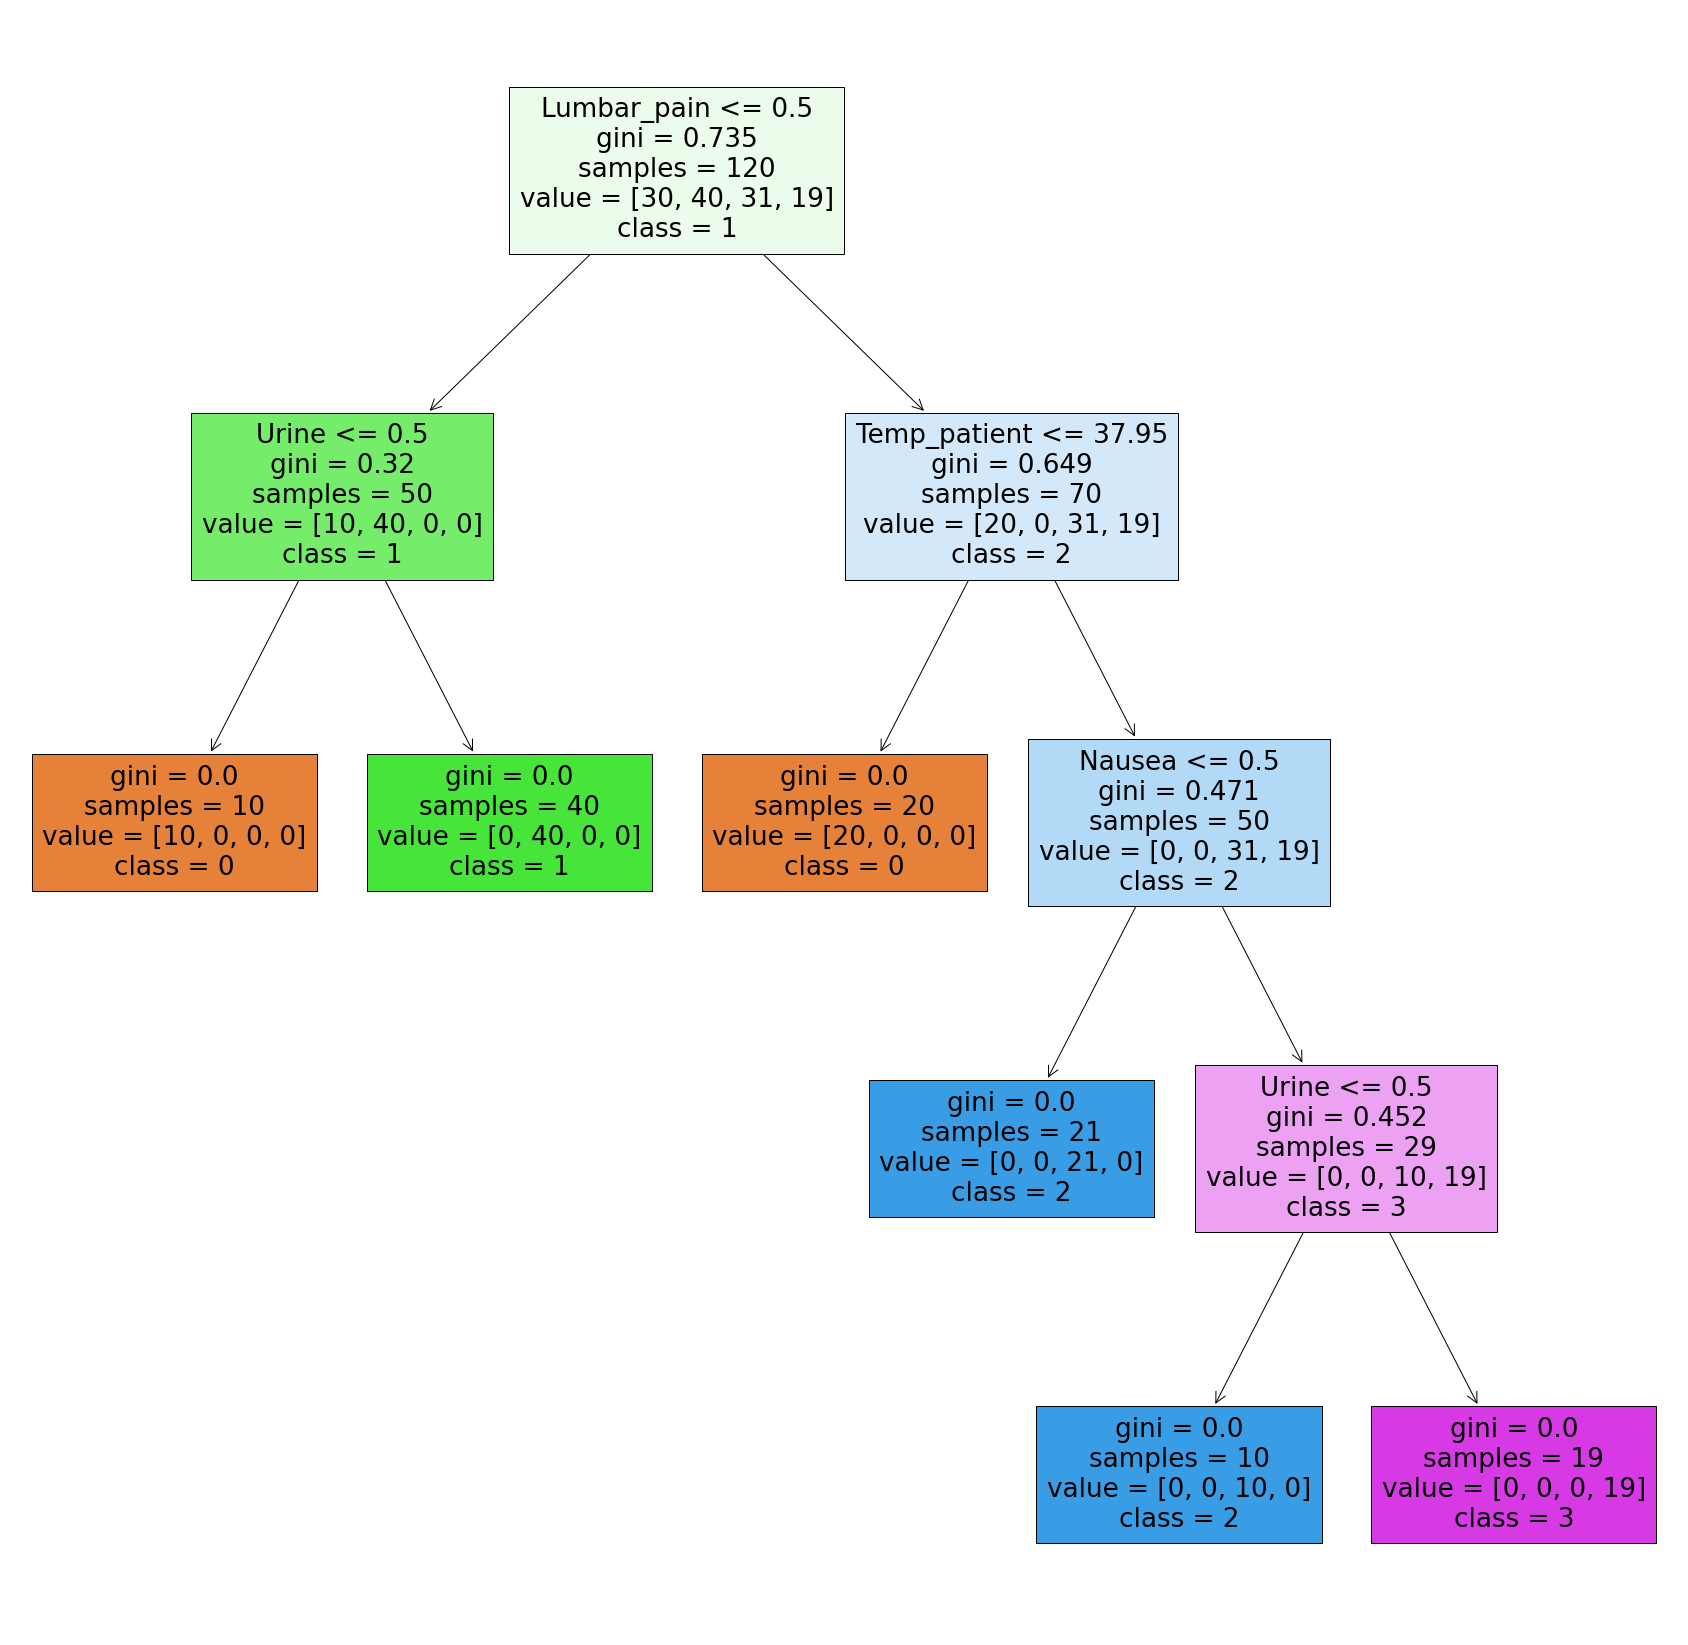

In [17]:
fig = plt.figure(figsize=(30, 30))
tree.plot_tree(pruned, filled=True, feature_names=cols, class_names=['0','1','2','3'])

In [18]:
def tree_to_code(tree, feature_names):
    """
    Outputs a decision tree model as a Python function
    Parameters:
    -----------
    tree: decision tree model
    The decision tree to represent as a function
    feature_names: list
    The feature names of the dataset used for building the decision tree
    """
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
            
    recurse(0,1)

In [19]:
tree_to_code(pruned, cols)

def tree(Temp_patient, Nausea, Lumbar_pain, Urine, Micturition, Urethra, Inflammation, Nephritis):
  if Lumbar_pain <= 0.5:
    if Urine <= 0.5:
      return [[10.  0.  0.  0.]]
    else:  # if Urine > 0.5
      return [[ 0. 40.  0.  0.]]
  else:  # if Lumbar_pain > 0.5
    if Temp_patient <= 37.95000076293945:
      return [[20.  0.  0.  0.]]
    else:  # if Temp_patient > 37.95000076293945
      if Nausea <= 0.5:
        return [[ 0.  0. 21.  0.]]
      else:  # if Nausea > 0.5
        if Urine <= 0.5:
          return [[ 0.  0. 10.  0.]]
        else:  # if Urine > 0.5
          return [[ 0.  0.  0. 19.]]


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [20]:
x='''@attribute state numeric
@attribute county numeric
@attribute community numeric
@attribute communityname string
@attribute fold numeric
@attribute population numeric
@attribute householdsize numeric
@attribute racepctblack numeric
@attribute racePctWhite numeric
@attribute racePctAsian numeric
@attribute racePctHisp numeric
@attribute agePct12t21 numeric
@attribute agePct12t29 numeric
@attribute agePct16t24 numeric
@attribute agePct65up numeric
@attribute numbUrban numeric
@attribute pctUrban numeric
@attribute medIncome numeric
@attribute pctWWage numeric
@attribute pctWFarmSelf numeric
@attribute pctWInvInc numeric
@attribute pctWSocSec numeric
@attribute pctWPubAsst numeric
@attribute pctWRetire numeric
@attribute medFamInc numeric
@attribute perCapInc numeric
@attribute whitePerCap numeric
@attribute blackPerCap numeric
@attribute indianPerCap numeric
@attribute AsianPerCap numeric
@attribute OtherPerCap numeric
@attribute HispPerCap numeric
@attribute NumUnderPov numeric
@attribute PctPopUnderPov numeric
@attribute PctLess9thGrade numeric
@attribute PctNotHSGrad numeric
@attribute PctBSorMore numeric
@attribute PctUnemployed numeric
@attribute PctEmploy numeric
@attribute PctEmplManu numeric
@attribute PctEmplProfServ numeric
@attribute PctOccupManu numeric
@attribute PctOccupMgmtProf numeric
@attribute MalePctDivorce numeric
@attribute MalePctNevMarr numeric
@attribute FemalePctDiv numeric
@attribute TotalPctDiv numeric
@attribute PersPerFam numeric
@attribute PctFam2Par numeric
@attribute PctKids2Par numeric
@attribute PctYoungKids2Par numeric
@attribute PctTeen2Par numeric
@attribute PctWorkMomYoungKids numeric
@attribute PctWorkMom numeric
@attribute NumIlleg numeric
@attribute PctIlleg numeric
@attribute NumImmig numeric
@attribute PctImmigRecent numeric
@attribute PctImmigRec5 numeric
@attribute PctImmigRec8 numeric
@attribute PctImmigRec10 numeric
@attribute PctRecentImmig numeric
@attribute PctRecImmig5 numeric
@attribute PctRecImmig8 numeric
@attribute PctRecImmig10 numeric
@attribute PctSpeakEnglOnly numeric
@attribute PctNotSpeakEnglWell numeric
@attribute PctLargHouseFam numeric
@attribute PctLargHouseOccup numeric
@attribute PersPerOccupHous numeric
@attribute PersPerOwnOccHous numeric
@attribute PersPerRentOccHous numeric
@attribute PctPersOwnOccup numeric
@attribute PctPersDenseHous numeric
@attribute PctHousLess3BR numeric
@attribute MedNumBR numeric
@attribute HousVacant numeric
@attribute PctHousOccup numeric
@attribute PctHousOwnOcc numeric
@attribute PctVacantBoarded numeric
@attribute PctVacMore6Mos numeric
@attribute MedYrHousBuilt numeric
@attribute PctHousNoPhone numeric
@attribute PctWOFullPlumb numeric
@attribute OwnOccLowQuart numeric
@attribute OwnOccMedVal numeric
@attribute OwnOccHiQuart numeric
@attribute RentLowQ numeric
@attribute RentMedian numeric
@attribute RentHighQ numeric
@attribute MedRent numeric
@attribute MedRentPctHousInc numeric
@attribute MedOwnCostPctInc numeric
@attribute MedOwnCostPctIncNoMtg numeric
@attribute NumInShelters numeric
@attribute NumStreet numeric
@attribute PctForeignBorn numeric
@attribute PctBornSameState numeric
@attribute PctSameHouse85 numeric
@attribute PctSameCity85 numeric
@attribute PctSameState85 numeric
@attribute LemasSwornFT numeric
@attribute LemasSwFTPerPop numeric
@attribute LemasSwFTFieldOps numeric
@attribute LemasSwFTFieldPerPop numeric
@attribute LemasTotalReq numeric
@attribute LemasTotReqPerPop numeric
@attribute PolicReqPerOffic numeric
@attribute PolicPerPop numeric
@attribute RacialMatchCommPol numeric
@attribute PctPolicWhite numeric
@attribute PctPolicBlack numeric
@attribute PctPolicHisp numeric
@attribute PctPolicAsian numeric
@attribute PctPolicMinor numeric
@attribute OfficAssgnDrugUnits numeric
@attribute NumKindsDrugsSeiz numeric
@attribute PolicAveOTWorked numeric
@attribute LandArea numeric
@attribute PopDens numeric
@attribute PctUsePubTrans numeric
@attribute PolicCars numeric
@attribute PolicOperBudg numeric
@attribute LemasPctPolicOnPatr numeric
@attribute LemasGangUnitDeploy numeric
@attribute LemasPctOfficDrugUn numeric
@attribute PolicBudgPerPop numeric
@attribute ViolentCrimesPerPop numeric'''.split('\n')

In [21]:
x = [i.split(' ')[1] for i in x]

In [22]:
df = pd.read_csv("data/communities.data", header=None, names=x)

In [23]:
df.replace(('?'),(np.nan),inplace=True)

In [24]:
df

state county community        communityname  fold  population  \
0         8    NaN       NaN         Lakewoodcity     1        0.19   
1        53    NaN       NaN          Tukwilacity     1        0.00   
2        24    NaN       NaN         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12    NaN       NaN    TempleTerracecity    10        0.01   
1990      6    NaN       NaN          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6    NaN       NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                    0                 0.91             0.28   
1992                    0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [25]:
#Removing columns which are non-predictive
df_fnl = df.drop(['state','county','community','communityname','fold'],axis=1)
df_fnl

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20       0.06           0.04   
1         0.02     0.12            0.45        NaN            NaN   
2         0.01     0.21            0.02        NaN            NaN   
3         0.02     0.39            0.28        NaN            NaN   
4         0.04     0.09            0.02        NaN            NaN   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05        NaN            NaN   
1990      0.02     0.37            0.20        NaN            NaN   
1991      0.08     0.32            0.18       0.08           0.06   
1992      0.03     0.38            0.33       0.02           0.02   
1993      0.11     0.30            0.05       0.08           0.04   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                     0.9                  0.5                 0.32   
1                     NaN                  NaN                 0.00   
2                     NaN                  NaN                 0.00   
3                     NaN                  NaN                 0.00   
4                     NaN                  NaN                 0.00   
...                   ...                  ...                  ...   
1989                  NaN                  NaN                 0.00   
1990                  NaN                  NaN                 0.00   
1991                 0.78                    0                 0.91   
1992                 0.79                    0                 0.22   
1993                 0.73                  0.5                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0                0.14                 0.20  
1                 NaN                 0.67  
2                 NaN                 0.43  
3                 NaN                 0.12  
4                 NaN                 0.03  
...               ...                  ...  
1989              NaN                 0.09  
1990              NaN                 0.45  
1991             0.28                 0.23  
1992             0.18   

In [26]:
train_data = df_fnl[0:1495]
test_data = df_fnl[1495:]

### (b) Missing values

In [27]:
imputer = SimpleImputer(strategy='mean')

# Impute missing values using mean imputation
imputed_data = imputer.fit_transform(df_fnl)

# Convert imputed data back to pandas DataFrame
final = pd.DataFrame(imputed_data, columns=df_fnl.columns)

In [28]:
final

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163103       0.076708   
2         0.01     0.21            0.02   0.163103       0.076708   
3         0.02     0.39            0.28   0.163103       0.076708   
4         0.04     0.09            0.02   0.163103       0.076708   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05   0.163103       0.076708   
1990      0.02     0.37            0.20   0.163103       0.076708   
1991      0.08     0.32            0.18   0.080000       0.060000   
1992      0.03     0.38            0.33   0.020000       0.020000   
1993      0.11     0.30            0.05   0.080000       0.040000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.698589             0.440439                 0.00   
2                0.698589             0.440439                 0.00   
3                0.698589             0.440439                 0.00   
4                0.698589             0.440439                 0.00   
...                   ...                  ...                  ...   
1989             0.698589             0.440439                 0.00   
1990             0.698589             0.440439                 0.00   
1991             0.780000             0.000000                 0.91   
1992             0.790000             0.000000                 0.22   
1993             0.730000             0.500000                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.195078                 0.67  
2            0.195078                 0.43  
3            0.195078                 0.12  
4            0.195078                 0.03  
...               ...                  ...  
1989         0.195078                 0.09  
1990         0.195078                 0.45  
1991         0.280000                 0.23  
1992         0.180000   

### (c) Plot a correlation matrix

In [29]:
cor = final.corr()

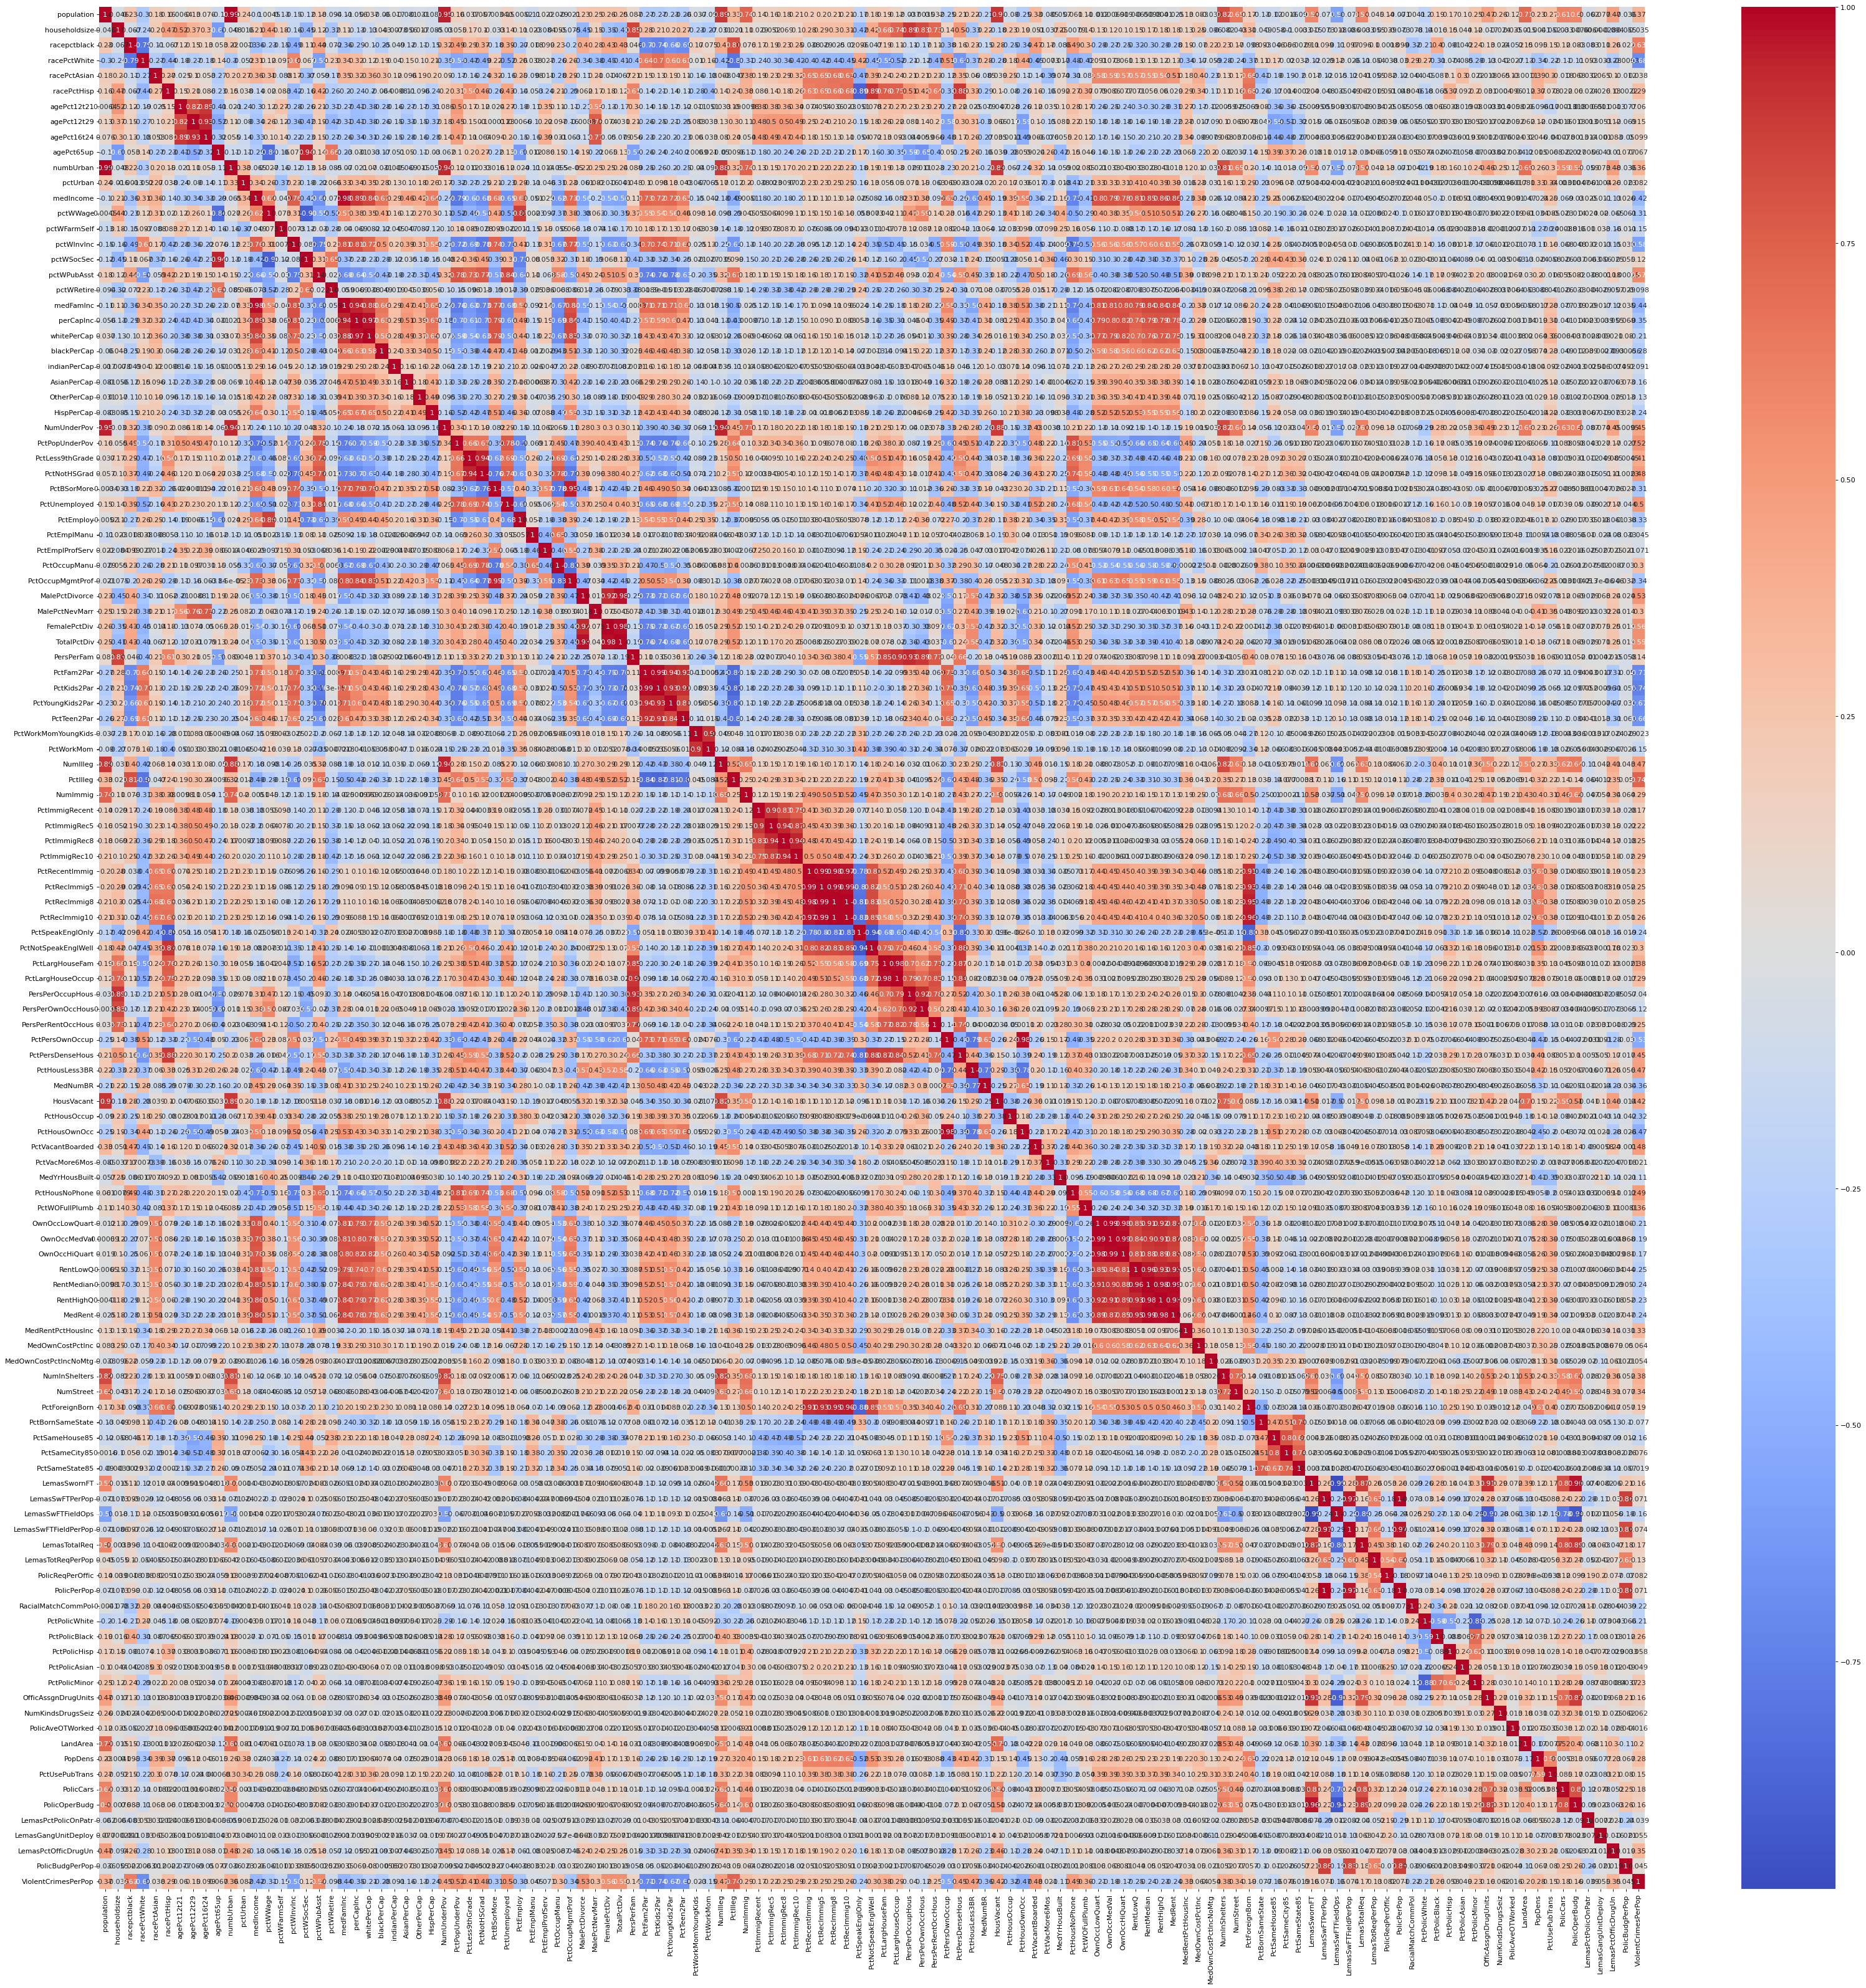

In [30]:
plt.figure(figsize=(50,50),dpi=80)
sns.heatmap(cor, cmap='coolwarm', annot=True);

### (d) Calculate the Coefficient of Variation CV

In [31]:
cv = final.std() / final.mean()

In [32]:
cv_df = pd.DataFrame({'CV': cv})
cv_df

CV
population           2.203503
householdsize        0.353298
racepctblack         1.410920
racePctWhite         0.323782
racePctAsian         1.359162
...                       ...
LemasPctPolicOnPatr  0.122331
LemasGangUnitDeploy  0.368040
LemasPctOfficDrugUn  2.555266
PolicBudgPerPop      0.337281
ViolentCrimesPerPop  0.979015

[123 rows x 1 columns]

### (e) Scatter plots and box plots for highest CV features

In [33]:
count=math.floor(np.sqrt(128))
count

11

In [34]:
top_features = cv.sort_values(ascending=False).head(count).index
top_features

Index(['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig',
       'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban',
       'HousVacant', 'LandArea', 'racePctHisp'],
      dtype='object')

In [35]:
df_t = final[top_features]
df_i = final['ViolentCrimesPerPop']
frames = [df_t, df_i]
df_top = pd.concat(frames, axis=1)

In [36]:
df_top

NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0          0.00           0.04      0.04      0.03                 0.32   
1          0.00           0.00      0.00      0.01                 0.00   
2          0.00           0.00      0.01      0.00                 0.00   
3          0.00           0.00      0.03      0.02                 0.00   
4          0.00           0.00      0.00      0.00                 0.00   
...         ...            ...       ...       ...                  ...   
1989       0.00           0.00      0.00      0.01                 0.00   
1990       0.00           0.01      0.03      0.05                 0.00   
1991       0.02           0.06      0.13      0.06                 0.91   
1992       0.01           0.04      0.02      0.06                 0.22   
1993       0.08           0.08      0.11      0.20                 1.00   

      NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  \
0            0.08        0.19       0.20        0.21      0.12         0.17   
1            0.01        0.00       0.02        0.02      0.02         0.07   
2            0.01        0.00       0.00        0.01      0.01         0.04   
3            0.01        0.04       0.06        0.01      0.02         0.10   
4            0.00        0.01       0.02        0.01      0.04         0.05   
...           ...         ...        ...         ...       ...          ...   
1989         0.01        0.01       0.03        0.02      0.01         0.16   
1990         0.04        0.05       0.06        0.03      0.02         0.32   
1991         0.12        0.16       0.17        0.21      0.08         0.25   
1992         0.03        0.08       0.09        0.05      0.03         0.10   
1993         0.16        0.20       0.21        0.12      0.11         0.77   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 12 columns]

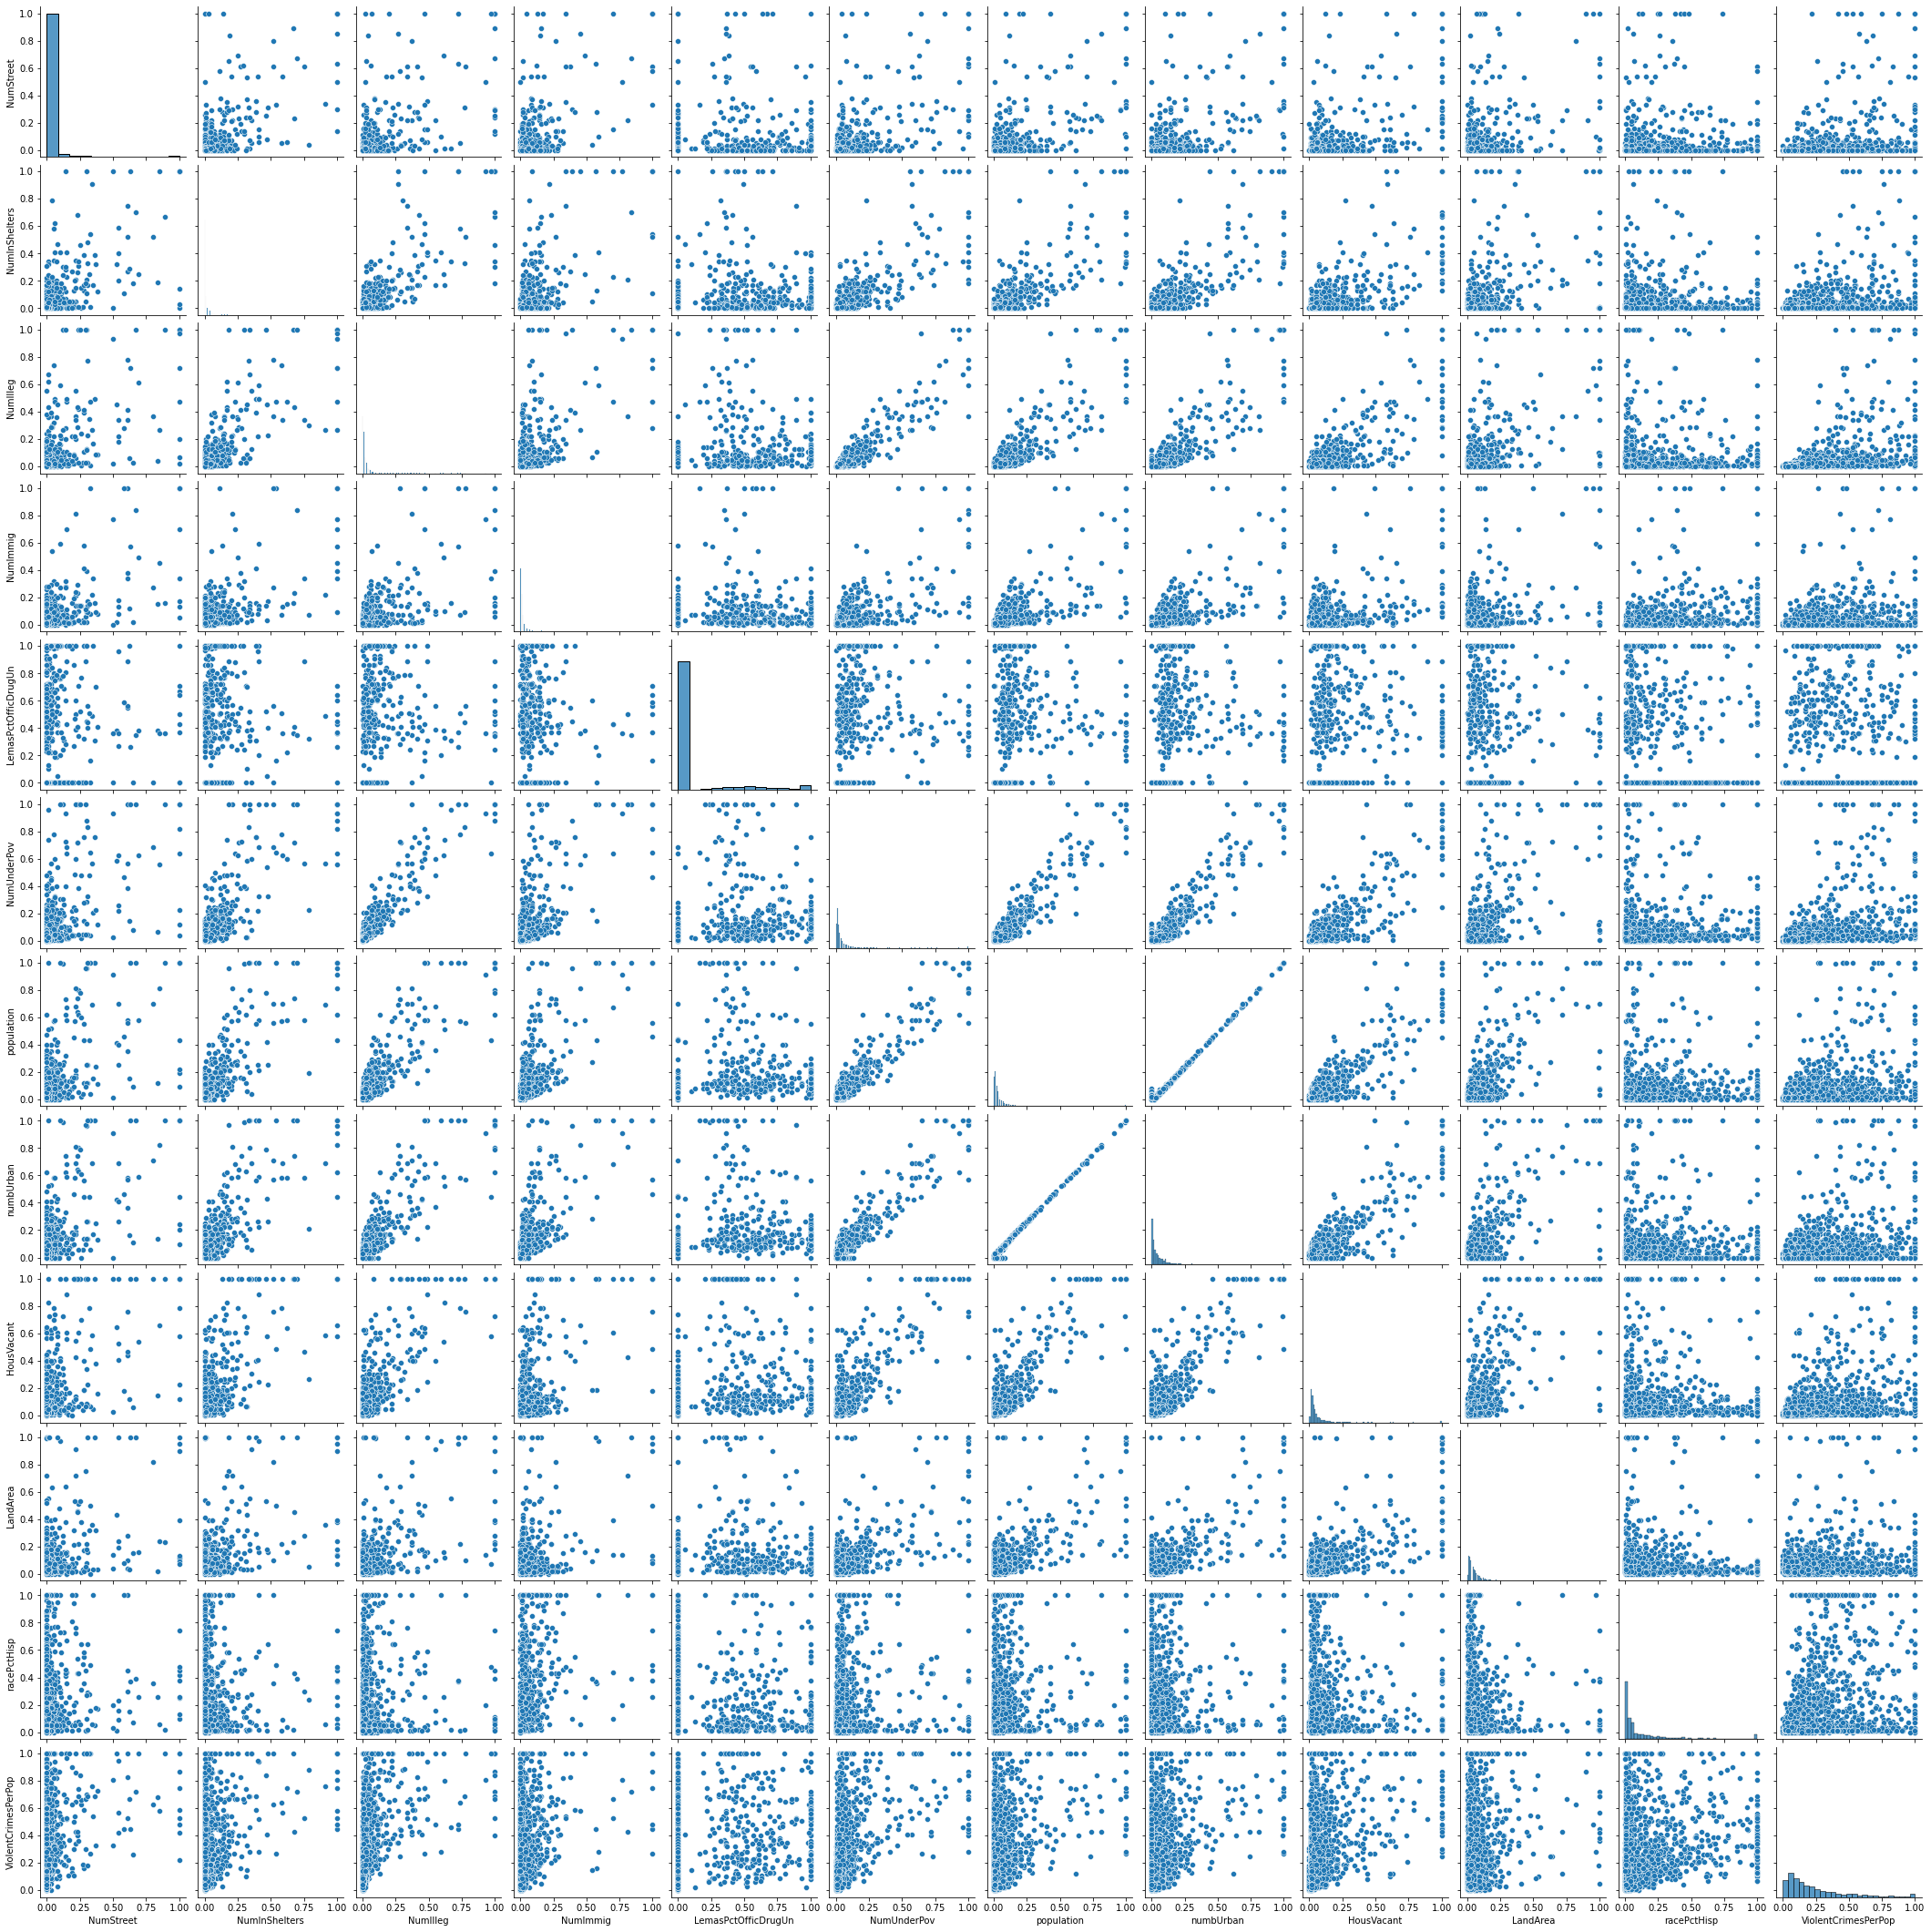

In [37]:
sns.pairplot(df_top);

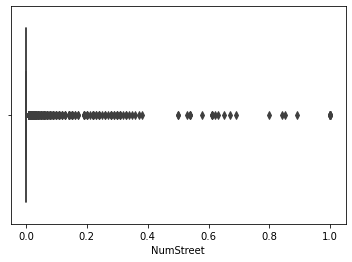

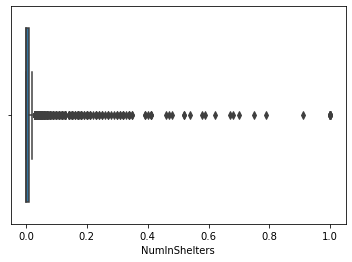

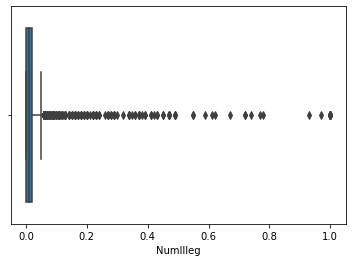

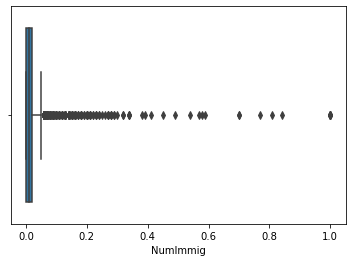

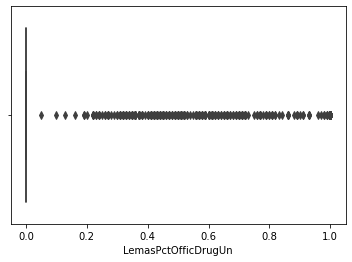

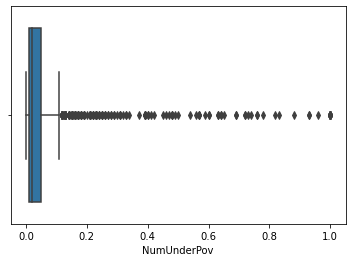

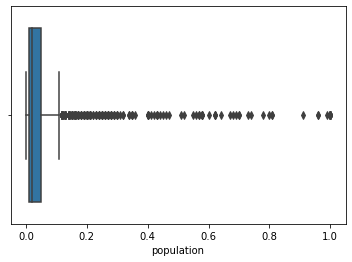

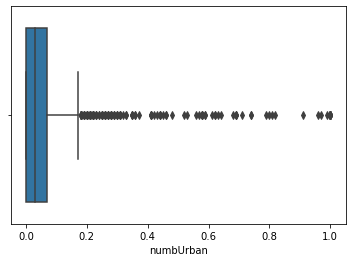

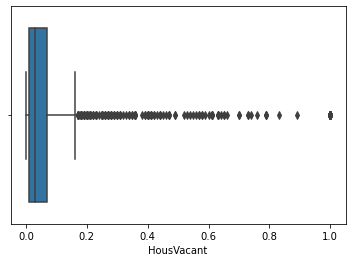

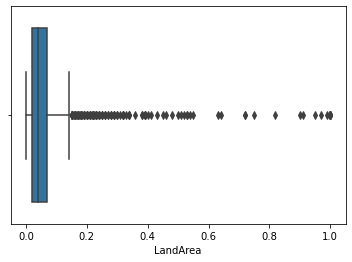

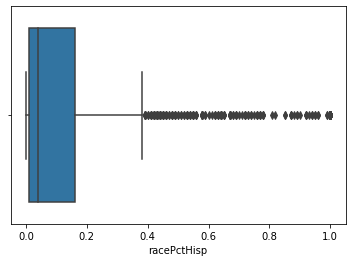

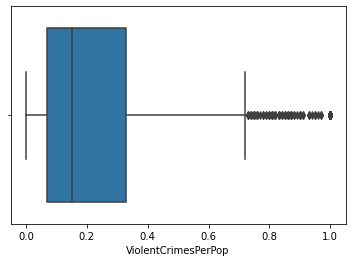

In [38]:
for i in df_top.columns:
    plt.figure()
    sns.boxplot(df_top[i])

No Conclusion can be made of the significance of the features with only Scatter plot.

### (f) Fit a linear model

In [39]:
X_train = df_t[0:1495]
y_train = df_i[0:1495]
X_test = df_t[1495:]
y_test = df_i[1495:]

In [40]:
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

y_pred = model_lin.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)
print(f"Mean Squared error on Test set: {test_error:.3f}")

Mean Squared error on Test set: 0.029


### (g) Fit a ridge regression model

In [41]:
model_rid = RidgeCV(alphas=np.logspace(-10, 10, 21), cv=5)
model_rid.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
        cv=5)

In [42]:
bst_alpha=model_rid.alpha_
print(bst_alpha)

1.0


In [43]:
y_pred = model_rid.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
print(f'Test error on ridge regression: {test_error}')

Test error on ridge regression: 0.029242169129073917


### (h) Fit a LASSO model

In [44]:
model_las = LassoCV(alphas=np.logspace(-10, 10, 21), cv=5)
model_las.fit(X_train, y_train)

LassoCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
        cv=5)

In [45]:
best_alpha_lasso=model_las.alpha_
best_alpha_lasso

0.0001

In [46]:
lasso_clf = Lasso(alpha=best_alpha_lasso)
lasso_clf.fit(X_train,y_train)

y_lasso_pred_test=lasso_clf.predict(X_test)

print("MSE for Lasso Regression Test set:",mean_squared_error(y_test,y_lasso_pred_test))

MSE for Lasso Regression Test set: 0.029104009868047735


In [47]:
best_coeff_lasso=model_las.coef_
lasso_imp=[X_train.columns[x] for x in range(0,len(X_train.columns[:-1])) if best_coeff_lasso[x]!=0]

print(lasso_imp)

['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea']


In [48]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lasso_std = LassoCV(cv=5)
lasso_std.fit(X_train_std, y_train)

best_lasso=lasso_std.alpha_

lasso_clf = Lasso(alpha=best_lasso)
lasso_clf.fit(X_train,y_train)

y_lasso_pred_test=lasso_clf.predict(X_test)
print("MSE for Lasso Regression Test set:",mean_squared_error(y_test,y_lasso_pred_test))

best_coeff_lasso=model_las.coef_
lasso_imp=[X_train.columns[x] for x in range(0,len(X_train.columns[:-1])) if best_coeff_lasso[x]!=0]

print(lasso_imp)

MSE for Lasso Regression Test set: 0.03164028353391719
['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea']


### (i) Fit a PCR model

In [49]:
# Define a pipeline with PCA and Linear Regression
pipeline = Pipeline([
    ('pca', PCA()),
    ('reg', LinearRegression())
])

In [50]:
param_grid = {'pca__n_components': range(1, 11)}

In [51]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [52]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('reg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 11)},
             scoring='neg_mean_squared_error')

In [53]:
print('Best number of principal components: ', grid_search.best_params_['pca__n_components'])

Best number of principal components:  9


In [54]:
y_pred = grid_search.predict(X_test)

In [55]:
test_error = mean_squared_error(y_test, y_pred)
print('Test error on PCR model: ', test_error)

Test error on PCR model:  0.029218812131738


### (j) Fit a boosting tree

In [56]:
# Define the XGBRegressor model
xgb_model = xgb.XGBRegressor(seed=4)

In [57]:
param_grid = {'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100]}
# Perform grid search with cross-validation
cv_xgb = GridSearchCV(xgb_model, scoring = 'neg_mean_squared_error',param_grid=param_grid, cv=5)
cv_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [58]:
# Get the best hyperparameters
best_alpha = cv_xgb.best_params_['reg_alpha']
print('Best Alpha: ', best_alpha)

Best Alpha:  1


In [59]:
# Fit the XGBoost model with the best hyperparameters
xgb_model_best = xgb.XGBRegressor(seed=4, reg_alpha=best_alpha)
xgb_model_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=4, ...)

In [60]:
# Evaluate the model on the test set
y_pred = xgb_model_best.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred)
print("Test error : {:.3f}".format(test_rmse))

Test error : 0.021
